# Módulo 5 - Técnicas de Programação II
## Aula 3
- Gráficos com Matplotlib
- Exercícios

## Gráficos com Matplotlib
O matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays. Gráficos comuns podem ser criados com alta qualidade a partir de comandos simples, inspirados nos comandos gráficos do MATLAB.  
Devido a sua alta qualidade e simplicidade de uso é a biblioteca gráfica mais popular para análise de dados. 
  
**Documentação**: https://matplotlib.org/

### Instalação
Caso já tenha instalado o pacote do **Matplotlib** ou está na dúvida, basta rodar o seguinte código:

In [1]:
import matplotlib

Se este código não rodou por erro ou se você não possui este pacote, para obtê-lo é simples, rode a célula abaixo

In [2]:
!pip install matplotlib

### Import da biblioteca
  
Para utilizarmos o matplotlib importamos o submódulo **pyplot** conforme podem observar na célula abaixo.

In [1]:
import matplotlib.pyplot as plt

O conjunto de funções disponível em **matplotlib.pyplot** permite a criação de uma figura, uma área para exibir o gráfico na figura, desenho de linhas na área do gráfico, decoração do gráfico com rótulos, etc. A sintaxe utilizada é semelhante ao MATLAB.  
   
Para simplificar o trabalho ainda mais, o pyplot já inicia com uma figura e área de desenho padrão, que você não precisa definir, e assim o código para gerar um gráfico pode ser simplesmente:

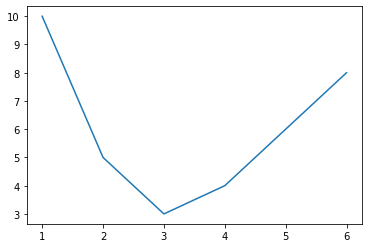

In [4]:
x = [1, 2, 3, 4, 5 ,6]
y = [10,5,3,4,6,8]
plt.plot(x, y)
plt.show()

Para não haver necessidade de rodar o comando **plt.show()** em todas as plotagens de gráficos utilizamos uma função mágica do matplotlib cujo objetivo é de que a saída dos comandos de plotagem é exibida em linha diretamente abaixo da célula de código que o produziu.

In [6]:
%matplotlib inline

Vamos importar também outros pacotes padrões

In [4]:
import pandas as pd
import numpy as np

## Scatter (dispersão)
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

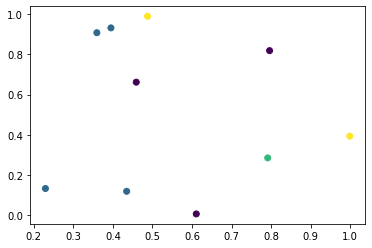

In [7]:
x = np.random.rand(10)
y = np.random.rand(10)
color = [1, 1, 2, 2, 2, 2, 3, 4, 1, 4] # Como se fosse uma dimensão a mais
plt.scatter(x, y, c=color);

Importando o dataset dos pinguins

In [8]:
df_size = pd.read_csv('./data/penguins_size.csv')
df_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


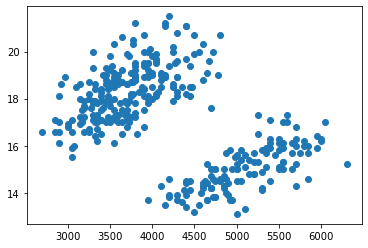

In [9]:
plt.scatter(x=df_size['body_mass_g'], y=df_size['culmen_depth_mm']);

É possíve verificar a diferença entre as plotagens através do Pandas e Matplotlib por meio do código abaixo.

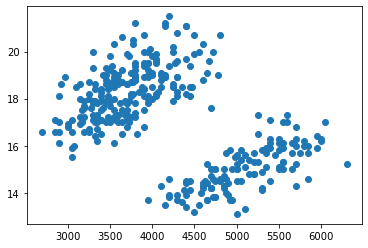

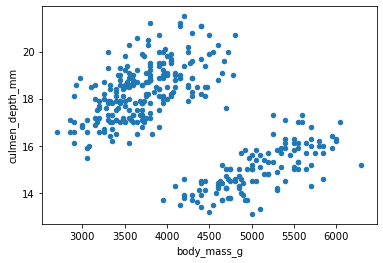

In [10]:
plt.scatter(df_size['body_mass_g'], df_size['culmen_depth_mm']) #matplotlib
df_size.plot(x='body_mass_g', y='culmen_depth_mm', kind='scatter'); #pandas

Nota-se que visualmente não há muita diferença, porém a sintaxe que gera os gráficos possui certas diferenças.

Podemos alterar as cores dos marcadores através de alguma variável do próprio dataframe como por exemplo o sexo dos pinguins.  
  
Por padrão o parâmetro *c* do scatter necessita de uma lista apenas com cores ou números. Como no nosso dataframe as categorias são MALE, FEMALE e NaN, apenas alteramos estes valores para 0, 1 e 2. 

In [11]:
df_size['sex'].isnull().sum()

10

In [12]:
df_tratado = df_size.dropna()

In [13]:
df_tratado['sex'].str.lower()

0        male
1      female
2      female
4      female
5        male
        ...  
338    female
340    female
341      male
342    female
343      male
Name: sex, Length: 334, dtype: object

In [14]:
# Mais fácil tratar desse jeito
df_tratado.replace({"MALE":0, "FEMALE":1, np.nan:2, ".":3})

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [15]:
# Caso queira eliminar o index com "."
df_tratado.drop(index = 336, axis = 0)['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 334, dtype: object

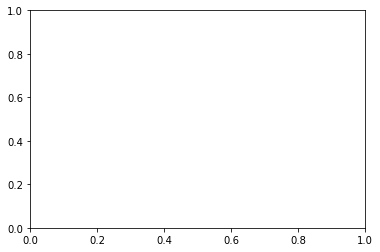

In [16]:
plt.scatter(df_tratado['body_mass_g'], df_tratado['culmen_depth_mm'],c=df_tratado['sex'])
# Precisa ser números ou cores em c=, por isso dá erro

In [17]:
from sklearn import preprocessing

In [18]:
## Gráfico de dispersão das medidas do bico do Pinguim, com tamanho variando pelo tamanho do tronco
le = preprocessing.LabelEncoder()
df_size['sex_encoded'] = le.fit_transform(df_size['sex'])

In [19]:
df_size['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [20]:
df_size['sex_encoded'].value_counts()

2    168
1    165
3     10
0      1
Name: sex_encoded, dtype: int64

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\gabri\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\gabri\Anaconda3\lib\site-packages\matplotlib\ticker.py:665: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


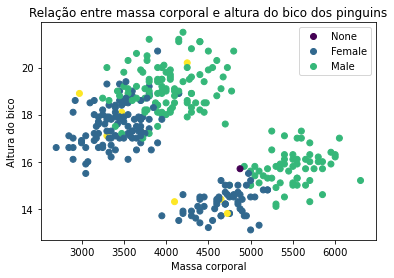

In [21]:
ax = plt.scatter(x=df_size['body_mass_g'], y=df_size['culmen_depth_mm'], c=df_size['sex_encoded'])
plt.legend(handles=ax.legend_elements()[0], labels=['None', 'Female', 'Male'])
plt.xlabel('Massa corporal')
plt.ylabel('Altura do bico')
plt.title('Relação entre massa corporal e altura do bico dos pinguins');

Ajustando o tamanho da figura na qual o gráfico será plotado

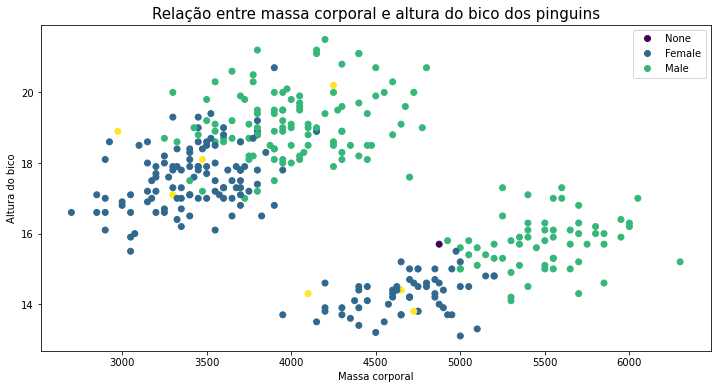

In [22]:
plt.figure(figsize=(12,6))

ax = plt.scatter(x=df_size['body_mass_g'], y=df_size['culmen_depth_mm'], c=df_size['sex_encoded'])
plt.legend(handles=ax.legend_elements()[0], labels=['None', 'Female', 'Male'])

plt.xlabel('Massa corporal')
plt.ylabel('Altura do bico')
plt.title('Relação entre massa corporal e altura do bico dos pinguins', fontsize=15);

## Linhas
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

In [23]:
df_vendas = pd.DataFrame({'Mês' : ['Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr'],
                         'Quantidade' : np.random.randint(low=100, size=12),
                          'Veículo' : np.repeat(['HB20', 'Onix', 'Sandero'],4)})
df_vendas.head()

,Mês,Quantidade,Veículo
0,Jan,77,HB20
1,Fev,49,HB20
2,Mar,7,HB20
3,Abr,77,HB20
4,Jan,12,Onix


### Estrutura  
No matplotlib, temos dois conceitos importantes:  
  
* Área de plotagem (eixos ou Axes)
    área onde os gráficos (linhas, barras, pontos, labels, ticks, etc) aparecem. Cada Axes possui um eixo-x e eixo-y.
* Figure
    é o container de nível superior que mantém toda a estrutura. É a janela onde tudo é desenhado e controlado. Dentro dele podemos ter vários gráficos independentes.
  
  
Antes de gerarmos múltiplos gráficos, precisamos decidir:

* podemos imprimir dois gráficos, ex: duas linhas, na mesma área de plotagem
* ou em áreas de plotagens diferentes.

**No mesmo Eixo**

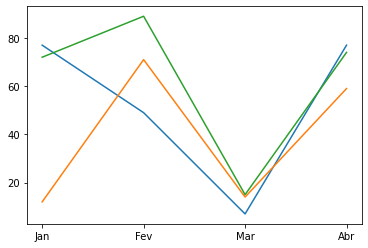

In [24]:
plt.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='HB20'])
plt.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Onix'])
plt.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Sandero']);

**Em vários eixos**  
Para plotar os gráficos em vários eixos utilizaresmos o método *plt.subplots*, cuja função é gerar uma figura e um conjunto de eixos pré-posicionados num formato de grade.  
  
Para isso, ao chamarmos essa função, iremos passar dois argumentos:
* nrows: indica quantas linhas. 
* ncols: indinca quantas colunas.
  
No exemplo abaixo teremos 4 gráficos sendo, portanto, 2 linhas e 2 colunas. Desta forma, retornará uma tupla de dois elementos:  
  
* um objeto do tipo Figure que representa a figura  
* lista ou matriz de eixos  
  
Podemos acessar cada eixo usando a notação de colchetes, e invocar a função de plot normalmente.

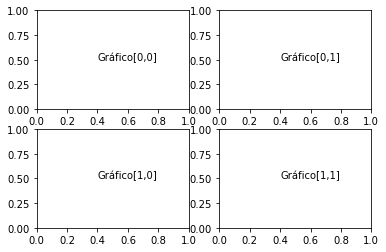

In [25]:
fig, axs = plt.subplots(2, 2)
axs[0,0].text(0.4, 0.5, 'Gráfico[0,0]')
axs[0,1].text(0.4, 0.5, 'Gráfico[0,1]')
axs[1,0].text(0.4, 0.5, 'Gráfico[1,0]')
axs[1,1].text(0.4, 0.5, 'Gráfico[1,1]');

No exemplo de vendas temos 3 gráficos, por isso é possível fazer os subplots com 3 linhas e 1 coluna ou 1 linha e 3 colunas. Aqui, seguiremos com o segundo cas (1 linha e 3 colunas).  

Repare que ao passar nrows=1, espertamente, o matplotlib não devolve uma matriz e sim uma lista.  

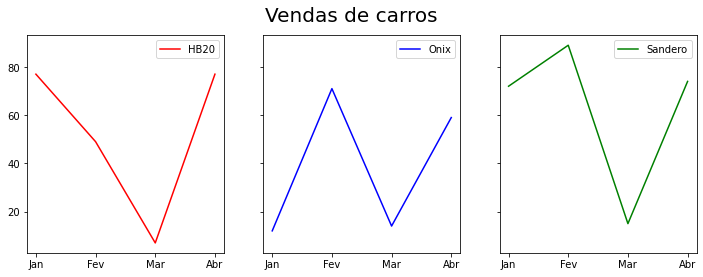

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey = True)
fig.suptitle('Vendas de carros', fontsize=20)
axs[0].plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='HB20'], c='red', label = 'HB20')
axs[1].plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Onix'], c='blue', label = 'Onix')
axs[2].plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Sandero'], c='green', label = 'Sandero')

axs[0].legend()
axs[1].legend()
axs[2].legend(loc="upper right");

Para diferenciarmos os gráficos podemos utilizar os parâmetros linewidth, linestyle e color. Estes parâmetros podem ser utilizados por meio de abreviações de linewidth = lw, linestyle = ls e color = c.

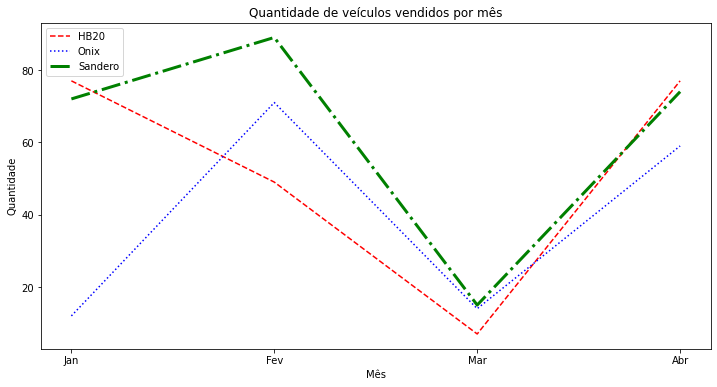

In [27]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='HB20'], c='red', ls='--', label='HB20')
ax.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Onix'], c='blue', ls=':', label='Onix')
ax.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Sandero'], c='green', ls='-.', label='Sandero', lw=3);

ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de veículos vendidos por mês')

ax.legend(loc='upper left');

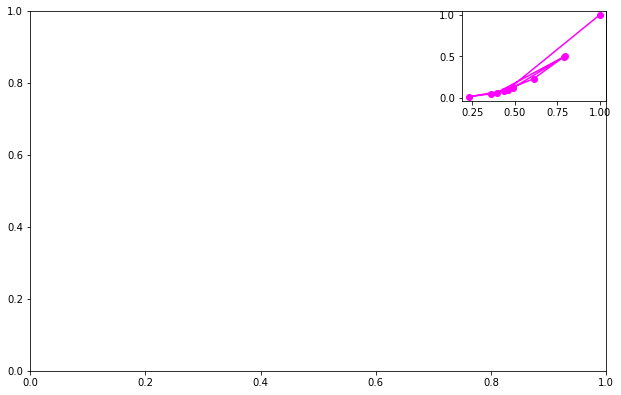

In [28]:
# x = range(10)
y1 = [n ** 2 for n in x]
y2 = [n ** 3 for n in x]

figure = plt.figure(figsize=(8,5))

ax1 = figure.add_axes([0, 0, 1, 1]) # axe grande
ax2 = figure.add_axes([0.75, 0.75, 0.25, 0.25]) # axe pequeno
#ax1.plot(x, y1, c='#66CDAA', ls='--', lw=5)
ax2.plot(x, y2, c='#FF00FF', marker='o');

Para utilizar cores hexadecimal é possível consultar alguns códigos no link https://celke.com.br/artigo/tabela-de-cores-html-nome-hexadecimal-rgb

## Pizza
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

In [29]:
df_veiculo = df_vendas.pivot_table(index='Veículo', values='Quantidade', aggfunc='sum')
df_veiculo.head()

,Quantidade
Veículo,
HB20,210
Onix,156
Sandero,250


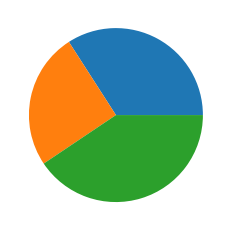

In [30]:
plt.pie('Quantidade', data=df_veiculo);

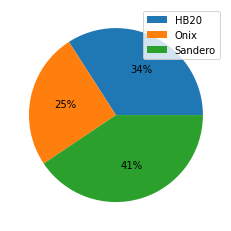

In [31]:
plt.pie('Quantidade', data=df_veiculo, autopct='%1.0f%%')
plt.legend(labels=['HB20', 'Onix', 'Sandero']);

In [32]:
df_vendas['Mês'] = pd.Categorical(df_vendas['Mês'], categories=["Jan", "Fev", "Mar", "Abr"], ordered=True)
df_mes = df_vendas.pivot_table(index='Mês', values='Quantidade', aggfunc='sum')
df_mes.head()

,Quantidade
Mês,
Jan,161
Fev,209
Mar,36
Abr,210


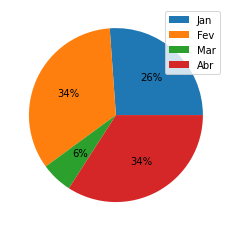

In [33]:
plt.pie('Quantidade', data=df_mes, autopct='%1.0f%%')
plt.legend(labels=['Jan', 'Fev', 'Mar', 'Abr']);

## Barras
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

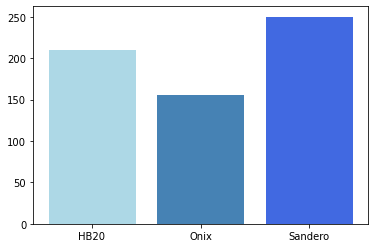

In [34]:
plt.bar(df_veiculo.index, df_veiculo['Quantidade'], color=['#ADD8E6', '#4682B4', '#4169E1']);

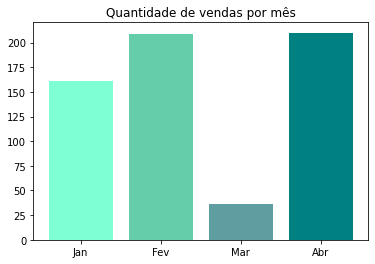

In [35]:
ax = plt.bar(df_mes.index, df_mes['Quantidade'], color=['#7FFFD4', '#66CDAA', '#5F9EA0', '#008080'])
plt.title('Quantidade de vendas por mês');

**Barras Horizontais**

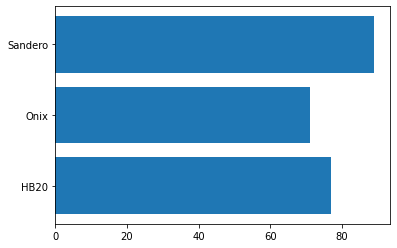

In [36]:
plt.barh(df_vendas['Veículo'], df_vendas['Quantidade']);

## Histograma
**Documentação**: https://matplotlib.org/stable/gallery/statistics/hist.html

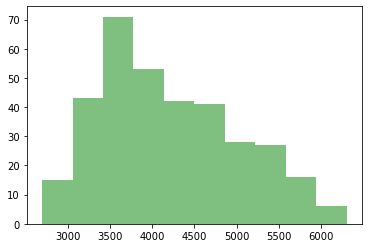

In [37]:
fig, ax = plt.subplots()
graf = ax.hist(x=df_size['body_mass_g'], alpha=0.5, color='green', bins=10);

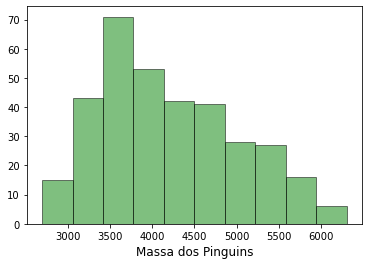

In [38]:
plt.hist(df_size['body_mass_g'], alpha=0.5, color='green', edgecolor='black')
plt.xlabel('Massa dos Pinguins', fontsize=12);

## Boxplot
**Documentação**: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [11]:
plt.boxplot(df_size['body_mass_g'], );

NameError: name 'df_size' is not defined

## Exemplo de EDA com Matplotlib
Para exemplificar o processo de Análise Exploratória de Dados utilizaremos um survey respondido por profissionais de TI da União Europeia, com informações pessoais como idade, gênero, cidade e também relacionadas às respectivas carreiras como posição na empresa, anos de experiência.

In [13]:
df_red = pd.read_csv('./data/winequality-red.csv', sep=';')
df_white = pd.read_csv('./data/winequality-white.csv', sep=';')

In [20]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


NameError: name 'df_vendas' is not defined

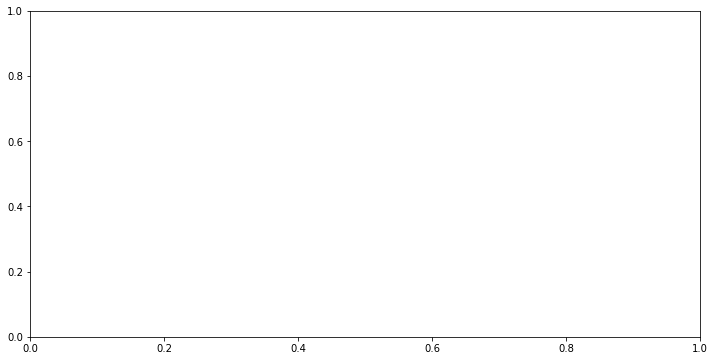

In [24]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='HB20'], c='red', ls='--', label='HB20')
ax.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Onix'], c='blue', ls=':', label='Onix')
ax.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Sandero'], c='green', ls='-.', label='Sandero', lw=3);

ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de veículos vendidos por mês')

ax.legend(loc='upper left');

## Exercício
Agora é hora de praticar!  
  
Os bancos obtêm uma receita importante com empréstimos concedidos. Mas muitas vezes está associado ao risco. O mutuário pode não pagar o empréstimo. Para mitigar esse problema, os bancos decidiram usar o Machine Learning para superar esse problema. Eles coletaram dados anteriores sobre os tomadores de empréstimos e gostariam que você desenvolvesse um modelo de ML forte para classificar se algum novo devedor provavelmente entrará em default ou não.  
  
O conjunto de dados é enorme e consiste em vários fatores determinísticos, como renda do mutuário, gênero, finalidade do empréstimo, etc. O conjunto de dados está sujeito a uma forte multicolinearidade e valores vazios. Você pode superar esses fatores e construir um classificador forte para prever inadimplentes?

Em "Status", 1 é mau cliente e 0 é bom cliente

Importe a base **Loan_Default.csv** que está em csv dentro do diretório **data**.

In [5]:
loan = pd.read_csv("./data/Loan_Default.csv")

In [29]:
loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,construction_type,occupancy_type,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,sb,pr,1740.0,EXP,758,25-34,to_inst,98.728814,south,1
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,sb,pr,4980.0,EQUI,552,55-64,to_inst,NaN,North,1
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,9480.0,EXP,834,35-44,to_inst,80.019685,south,0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,sb,pr,11880.0,EXP,587,45-54,not_inst,69.376900,North,0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,10440.0,CRIF,602,25-34,not_inst,91.886544,North,0


In [30]:
loan.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'income', 'credit_type',
       'Credit_Score', 'age', 'submission_of_application', 'LTV', 'Region',
       'Status'],
      dtype='object')

Verifique com a função .info os campos presentes na tabela

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_only              148670 non-null  object 
 13  lump_sum_payment           14

Imprima as estatísticas padrões do dataframe com a função .describe

In [9]:
loan.describe()

,ID,year,loan_amount,rate_of_interest,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.0,1.486700e+05,112231.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,0.0,1.839093e+05,0.561391,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,24890.000000,2019.0,1.650000e+04,0.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


### Gráficos

### 1) Verifique sua variável de interesse (Status) como a contagem de distribuição

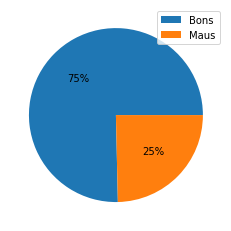

In [45]:
plt.pie(loan['Status'].value_counts().values, autopct = "%.0f%%")
plt.legend(labels=['Bons','Maus']);

---

### 2) Construa um gráfico de barras que permita verificar a Bad Rate (média da coluna Status) por tipo de crédito oferecido (credit_type). 

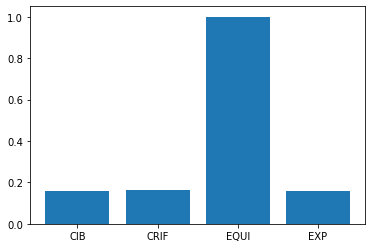

In [56]:
df_type = loan.pivot_table(index = "credit_type", values = "Status", aggfunc="mean") # Bad Rate
plt.bar(df_type.index, df_type['Status']);

---

### 3) Faça um gráfico de dispersão da Credit Score pela média do Status

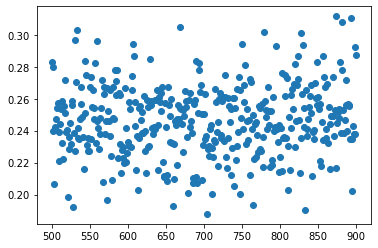

In [66]:
# Como assim?
df_score = loan.pivot_table(index = "Credit_Score", values = "Status", aggfunc="mean")
plt.scatter(df_score.index, df_score['Status']);

---

### 3) Por meio de um gráfico de dispersão, identifique o comportamento da média da variável de interesse (Status) por faixa etária

TypeError: 'value' must be an instance of str or bytes, not a float

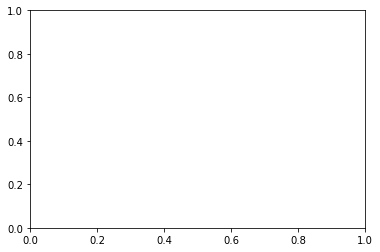

In [67]:
plt.scatter(loan["age"], loan["Status"])

---

### 4) Construa o histograma do montante de dívida (loan_amount) e verifique como está sua distribuição. Observe o mesmo com um gráfico boxplot.

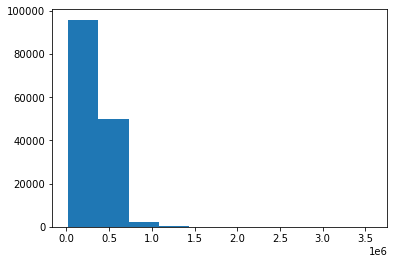

In [13]:
# histograma
plt.hist(loan["loan_amount"]);

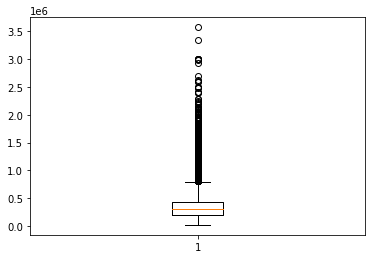

In [14]:
# boxplot
plt.boxplot(loan["loan_amount"]);

---

### 5) Como se encontra a distribuição das faixas-etárias nesta base de dados.  
*Obs.: utilize o gráfico de pizza*

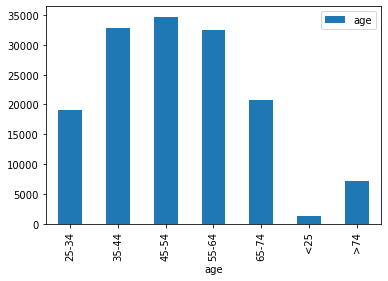

In [24]:
loan.groupby("age")[['age']].count().plot(kind="bar");

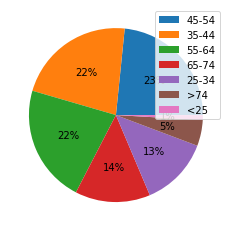

In [23]:
plt.pie(loan["age"].value_counts(), autopct="%1.0f%%");
plt.legend(["45-54", "35-44", "55-64", "65-74", "25-34", ">74", "<25"], loc = "upper right")

In [20]:
loan[["age"]].value_counts(normalize = True)

age  
45-54    0.233852
35-44    0.221041
55-64    0.219128
65-74    0.139718
25-34    0.128928
>74      0.048326
<25      0.009005
dtype: float64